In [1]:
import os, sys, numpy as np
import histogram.hdf as hh
import mcvine, mcvine.components

from matplotlib import pyplot as plt
%matplotlib notebook

from mcvine import run_script

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
workdir = os.path.expanduser("~/simulations/mcvine/qikr")
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/mcvine/qikr


In [10]:
def b2s(beam_neutrons, b2s_distance):
    instrument = mcvine.instrument()

    beam = mcvine.components.sources.NeutronFromStorage('beam', path=beam_neutrons)
    instrument.append(beam, position=(0,0,0))
    
    sample = mcvine.components.monitors.L_monitor(
        'sample', Lmin=0, Lmax=10, nchan=100, filename="L.dat", 
        xwidth=0.1, yheight=0.1)
    instrument.append(sample, position=(0,0,b2s_distance))
    
    return instrument

Number of neutrons in the beam

In [6]:
!mcvine neutronstorage count ./out-mcvine/step0/beam.neutrons

143892


In [12]:
%%time
!rm -rf ./debug-b2s/
instrument = b2s(beam_neutrons='./out-mcvine/step0/beam.neutrons', b2s_distance=0.05)
neutrons = instrument.simulate(int(1e6),outputdir="debug-b2s", overwrite_datafiles=False, iteration_no=0)

CPU times: user 1.96 s, sys: 980 ms, total: 2.94 s
Wall time: 3.06 s


<IPython.core.display.Javascript object>


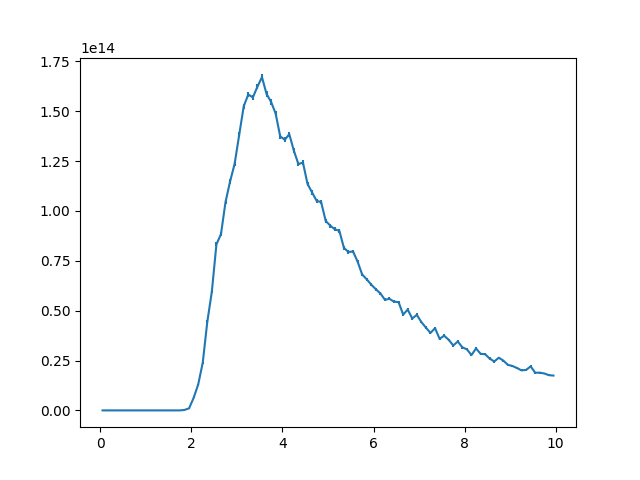

<Container object of 3 artists>

In [13]:
plt.figure()
h = hh.load('./debug-b2s/step0/L.h5')
plt.errorbar(h.wavelength, h.I, h.E2**.5)